# Time Series Data Analysis Tutorial

# Time Series Data Import in Python

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
# Import as Dataframe
df1 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df1.head(100)


Alternately, you can import it as a pandas Series with the date as index. You just need to specify the index_col argument in the pd.read_csv() to do this.

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df2.head(10)


# Time Series Panel Data

In [ ]:
# dataset source: https://github.com/rouseguy
df3 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df3 = df3.loc[df3.market=='MUMBAI', :]
df3.head()


# Visualizing Time Series Data

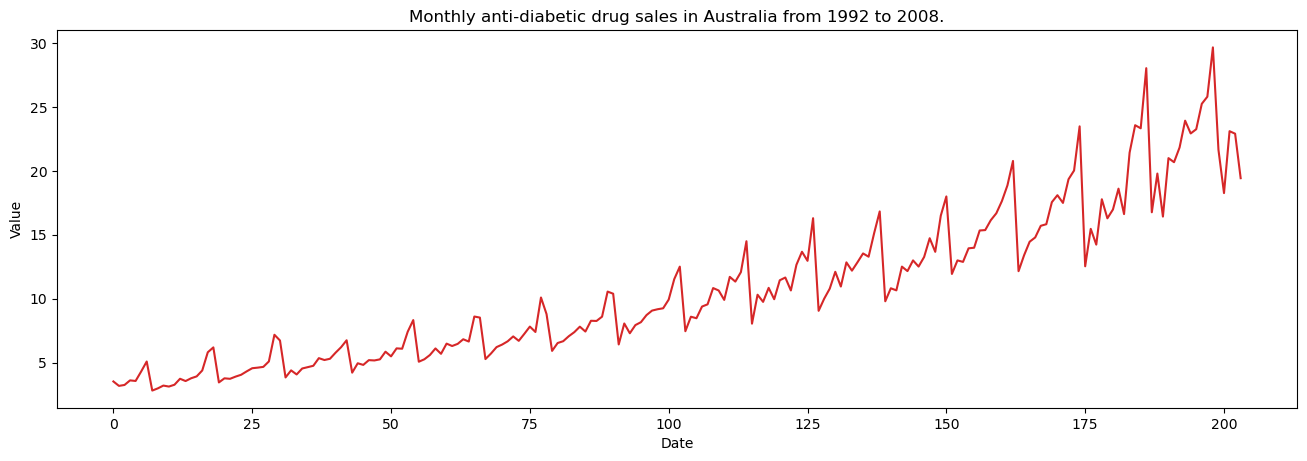

In [4]:
import matplotlib.pyplot as plt

# make a function for drawing the figure
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

#Now plot the time series data df1 that we imported earlier
plot_df(df1, x=df1.index, y=df1.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    


# Seasonal Plot of Time Series Data

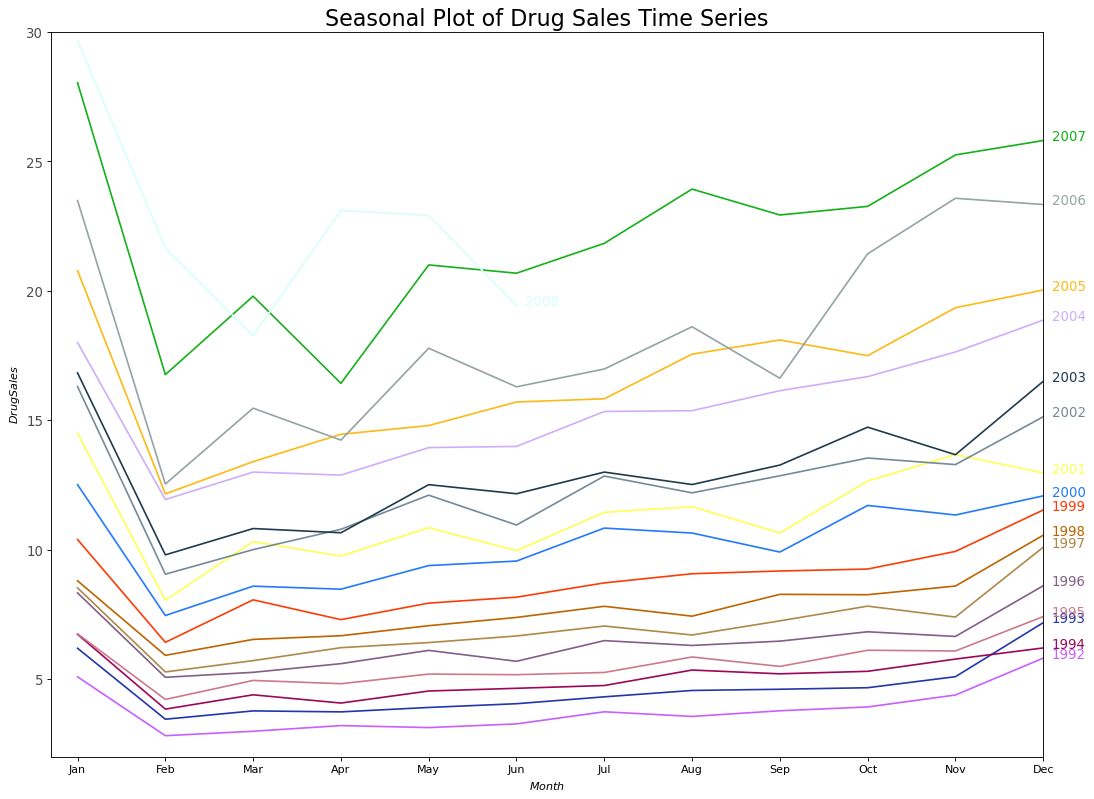

In [5]:

# Import Data
df4 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df4.reset_index(inplace=True)

# Prepare data
df4['year'] = [d.year for d in df4.date]
df4['month'] = [d.strftime('%b') for d in df4.date]
years = df4['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df4.loc[df4.year==y, :], color=mycolors[i], label=y)
        plt.text(df4.loc[df4.year==y, :].shape[0]-.9, df4.loc[df4.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

# Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

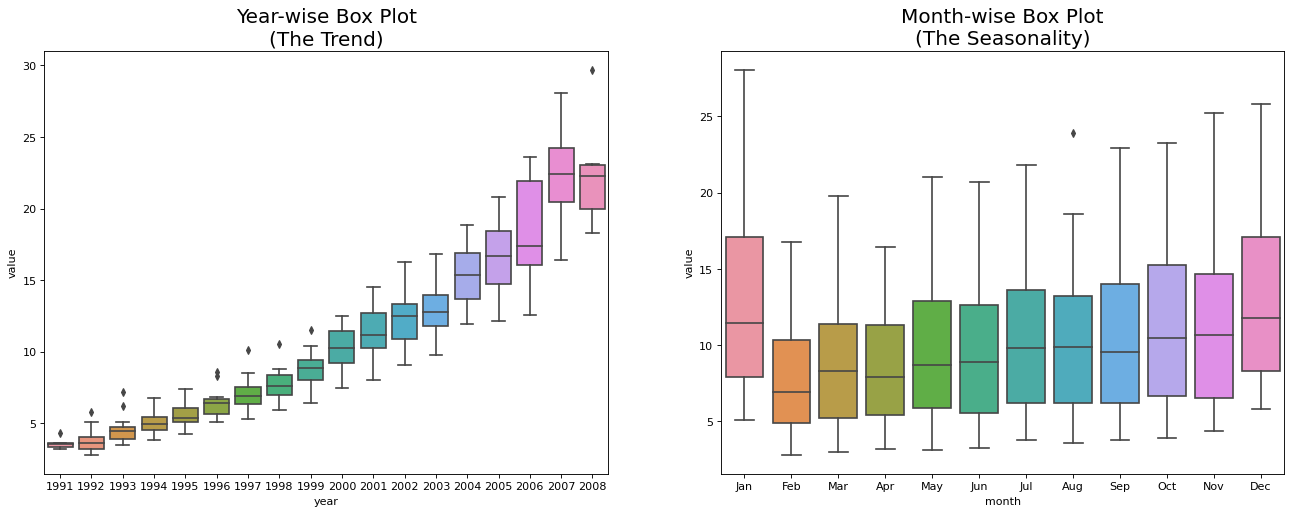

In [6]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()


# Patterns in Time Series Data

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

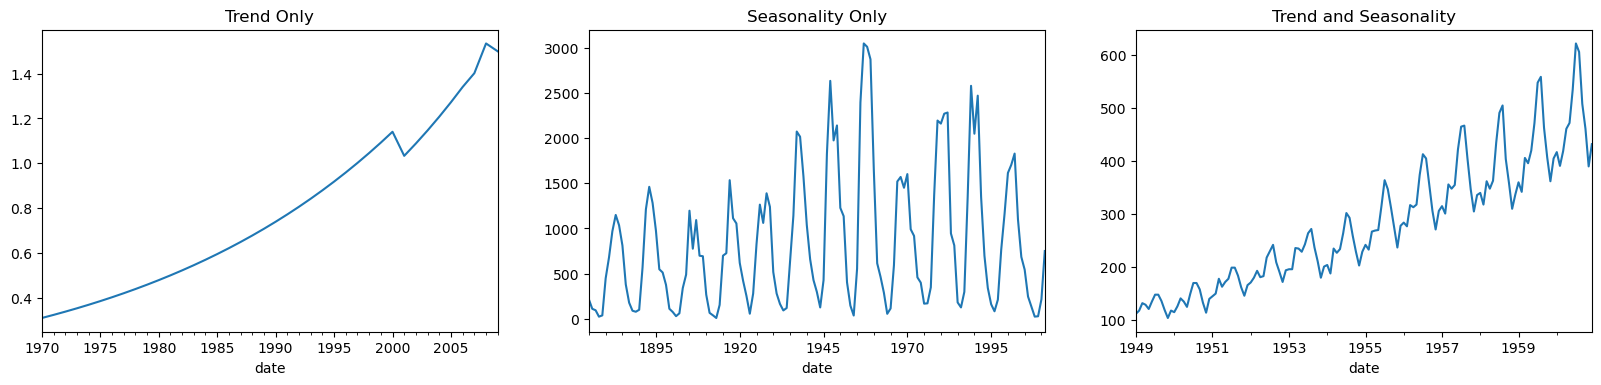

In [7]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)

adf1 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date')
adf1.plot(title='Trend Only', legend=False, ax=axes[0])

adf2 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date')
adf2.plot(title='Seasonality Only', legend=False, ax=axes[1])

adf3 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date')
adf3.plot(title='Trend and Seasonality', legend=False, ax=axes[2])


# Decompose a Time Series into its Components?

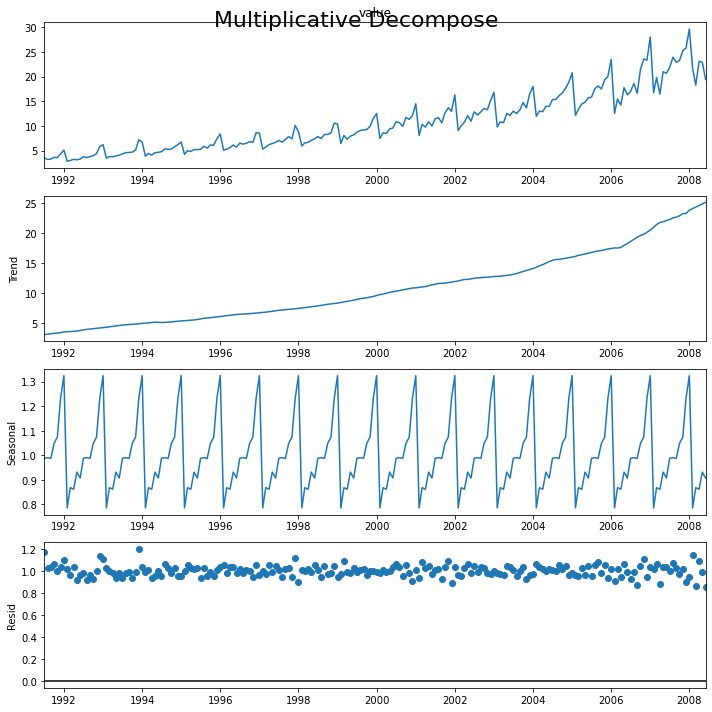

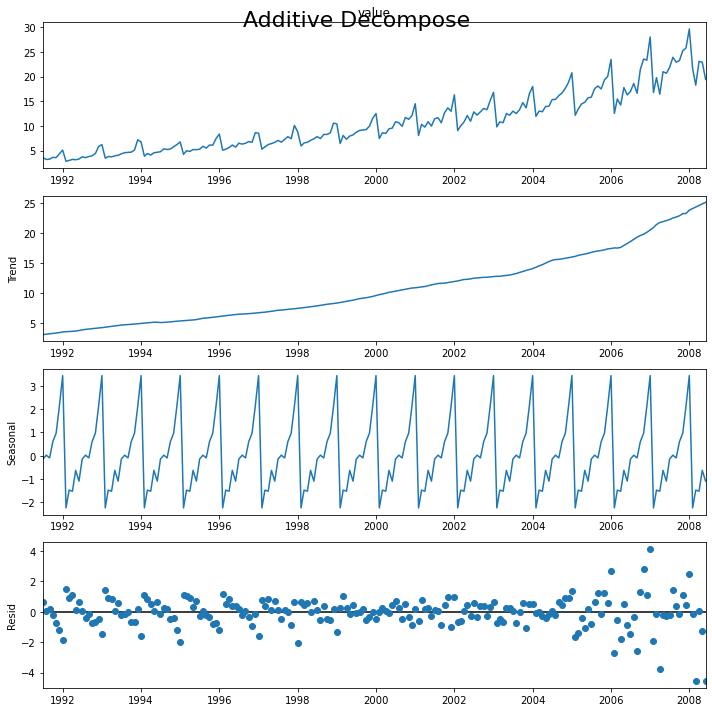

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the beginning of the series.

If you look at the residuals of the additive decomposition closely, it has some pattern left over. The multiplicative decomposition, however, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

The numerical output of the trend, seasonal and residual components are stored in the result_mul output itself. Let’s extract them and put it in a dataframe.

In [9]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)

df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()


,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


# White noise and a Stationary Time Series

<AxesSubplot:title={'center':'Random White Noise'}>

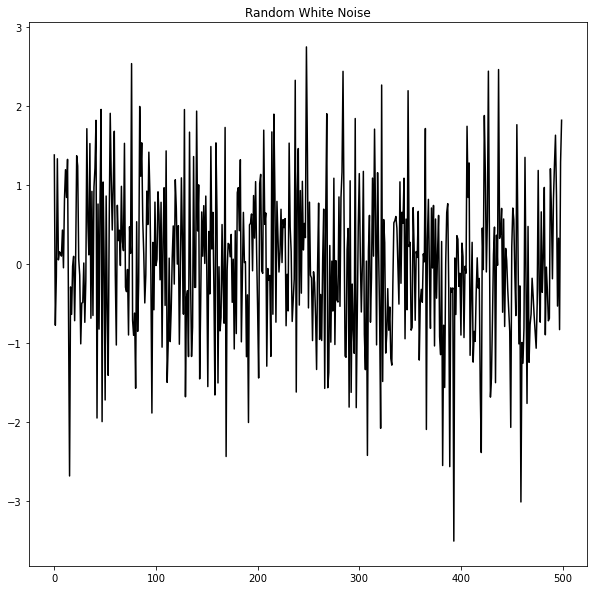

In [10]:
randvals = np.random.randn(500)
pd.Series(randvals).plot(title='Random White Noise', color='k')


# Detrend Time Series Data

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

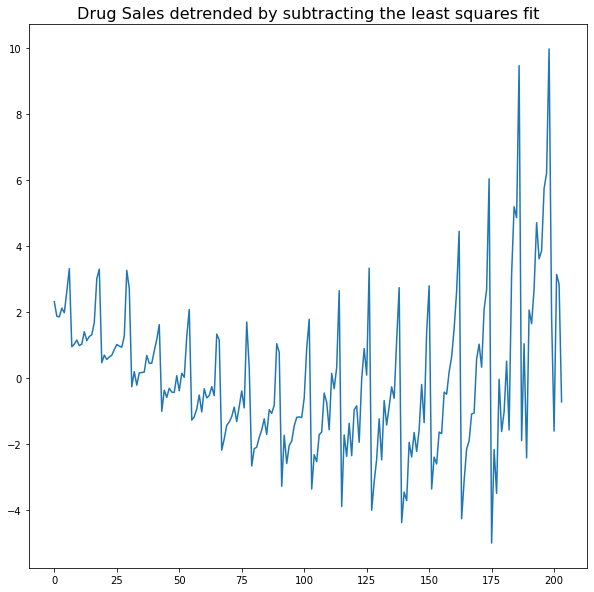

In [11]:
# Using scipy: Subtract the line of best fit
from scipy import signal
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

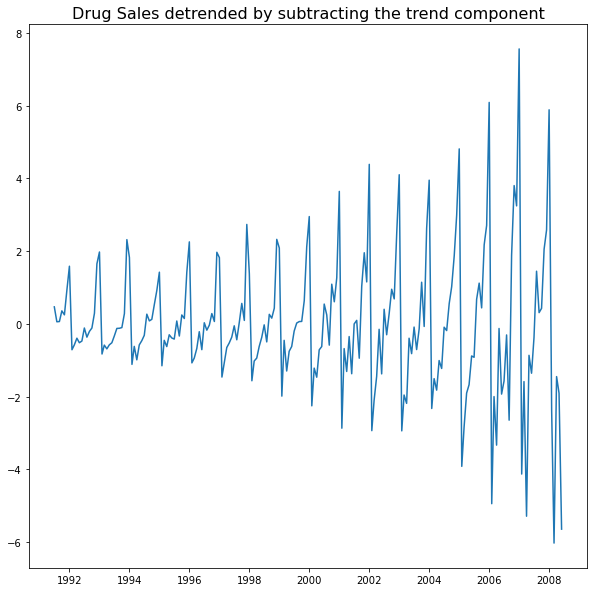

In [12]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend

plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)


# De-seasonalize Time Series Data

[]

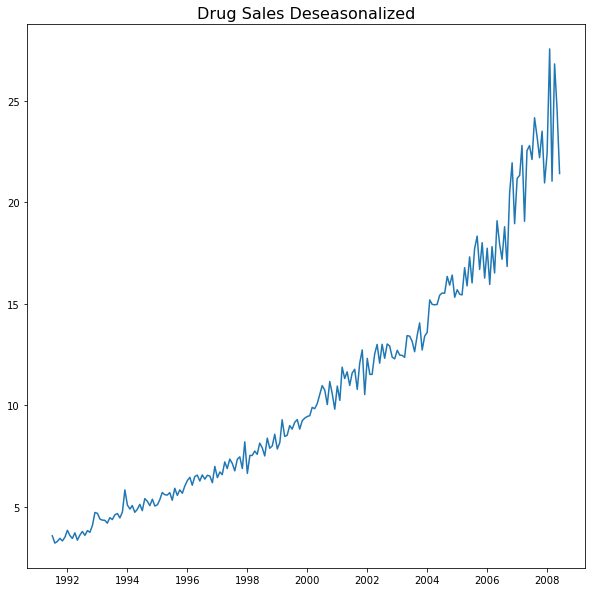

In [13]:
# Subtracting the Trend Component.
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal
# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()


How to test for seasonality of a time series?

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

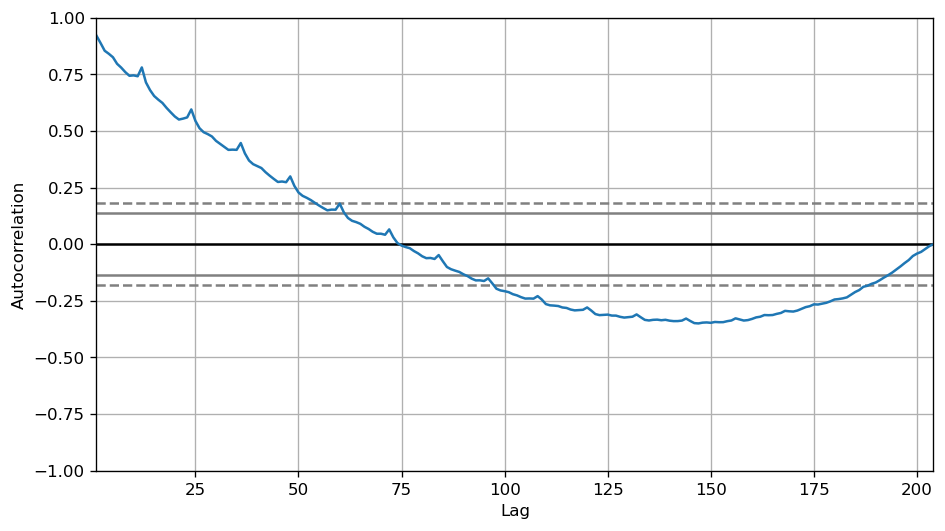

In [14]:
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())


# Handling Missing Values in Time Series Data

<AxesSubplot:title={'center':'Backward Fill (MSE: 0.51)'}, xlabel='date'>

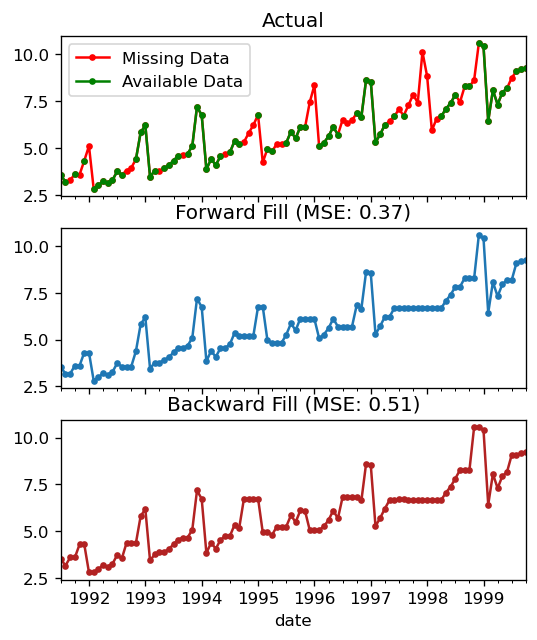

In [15]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10_missings.csv', parse_dates=['date'], index_col='date').head(100)

#df = pd.read_csv('datasets/a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(5, 6))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")



# Autocorrelation nad Partial Correlation

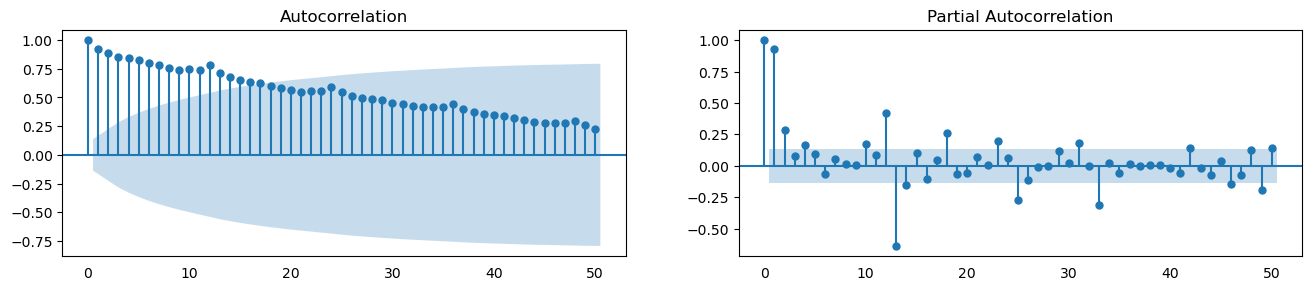

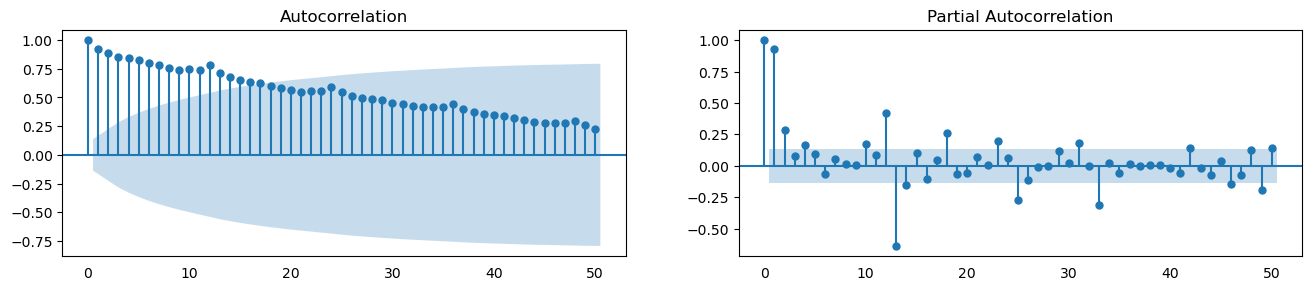

In [16]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])


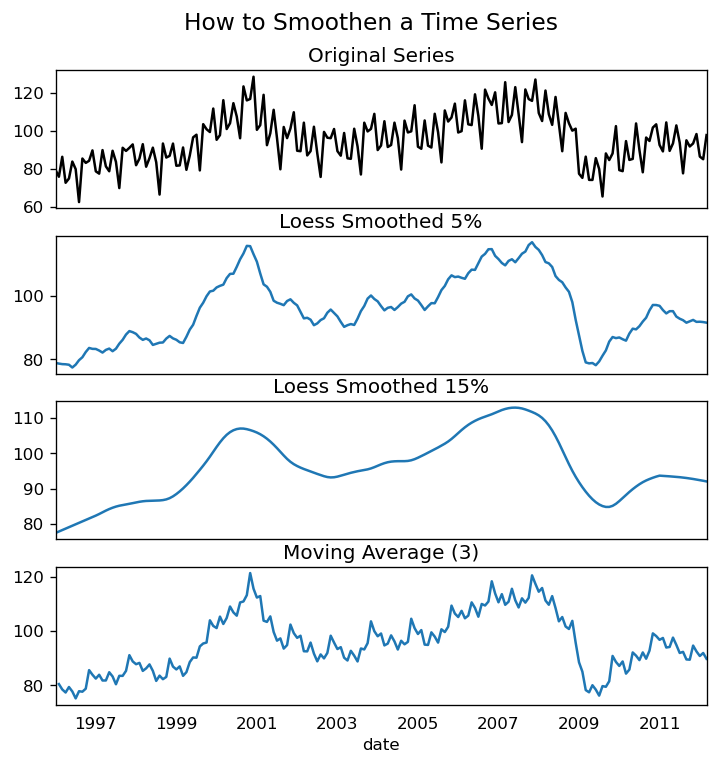

In [17]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/elecequip.csv', parse_dates=['date'], index_col='date')

# 1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()


# Extra Materials: Case Study 

A data set is given which is consisted of 2 years historical data including the information of total app installs per day due to spending amount on Facebook and Google ads by a marketing company. Also it is given whether there is promotion or not. Now find the missing values and categorical values and do some pre-processing task to handle missing values and categorical values.

In [18]:
#import necessary libraries now
# we will need more libraries but we will import that later

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

df10 = pd.read_csv("case_data.csv", sep = ';')

In [19]:
#Let's see the first 5 rows of the data sets

df10.head(10)

,Date,installs,spend_facebook,spend_google,promotion
0,1-1-2019,1667,1406.0,NaN,Yes
1,1-2-2019,1889,1197.0,NaN,Yes
2,1-3-2019,1462,1090.0,NaN,Yes
3,1-4-2019,1218,1434.0,NaN,Yes
4,1-5-2019,1721,1449.0,NaN,Yes
5,1-6-2019,1696,1475.0,NaN,Yes
6,1-7-2019,1528,1254.0,NaN,Yes
7,1-8-2019,1246,1223.0,NaN,Yes
8,1-9-2019,1248,1414.0,NaN,Yes
9,1-10-2019,1150,1383.0,NaN,Yes


Let's do some preprocessing data. before that, let's check if there is any missing value or not. also need to think about categorical values

First of all, rearrange the columns. Change the date coulmn into index. Move the installs column into the rightmost cloumn as we will predict this column. Then see the first few rows how this new rearranged data set looks like

In [20]:
df10 = df10.set_index("Date") # set Date as index
df10 = df10[['spend_facebook', 'spend_google', 'promotion', 'installs']] # rearrange the columns accordingly
df10.head(5)

,spend_facebook,spend_google,promotion,installs
Date,,,,
1-1-2019,1406.0,NaN,Yes,1667
1-2-2019,1197.0,NaN,Yes,1889
1-3-2019,1090.0,NaN,Yes,1462
1-4-2019,1434.0,NaN,Yes,1218
1-5-2019,1449.0,NaN,Yes,1721


check all missing values

In [21]:
df10.isnull()

,spend_facebook,spend_google,promotion,installs
Date,,,,
1-1-2019,False,True,False,False
1-2-2019,False,True,False,False
1-3-2019,False,True,False,False
1-4-2019,False,True,False,False
1-5-2019,False,True,False,False
...,...,...,...,...
2-24-2021,False,True,True,False
2-25-2021,False,True,True,False
2-26-2021,False,True,True,False


fill all missing values by 0 Give a new variable name df1

In [22]:
df11 = df10.fillna(0)
df11

,spend_facebook,spend_google,promotion,installs
Date,,,,
1-1-2019,1406.0,0.0,Yes,1667
1-2-2019,1197.0,0.0,Yes,1889
1-3-2019,1090.0,0.0,Yes,1462
1-4-2019,1434.0,0.0,Yes,1218
1-5-2019,1449.0,0.0,Yes,1721
...,...,...,...,...
2-24-2021,389.0,0.0,0,1972
2-25-2021,484.0,0.0,0,1812
2-26-2021,1044.0,0.0,0,1734


Handling categorical values. In this data set there are categorical values in column 'promotion'. Change this categorical value into neumerical one to make flexible for any model

In [23]:
df11['promotion'].replace(to_replace=['Yes'], value=[1], inplace=True)
df11.head(10)

,spend_facebook,spend_google,promotion,installs
Date,,,,
1-1-2019,1406.0,0.0,1,1667
1-2-2019,1197.0,0.0,1,1889
1-3-2019,1090.0,0.0,1,1462
1-4-2019,1434.0,0.0,1,1218
1-5-2019,1449.0,0.0,1,1721
1-6-2019,1475.0,0.0,1,1696
1-7-2019,1254.0,0.0,1,1528
1-8-2019,1223.0,0.0,1,1246
1-9-2019,1414.0,0.0,1,1248


At this stage I'm satisfied with the data. All missing values and categorical values have been taken care of. I am also aware to save this processed dataset for future use. Let's save it into a csv file

In [24]:
df11.to_csv('processed__case_data.csv')

You are done! 
Good Luck!